# Parte A

## Cargamos el dataframe y borramos duplicados en caso de que lo haya

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('titanic.csv')

print(len(df))

df.drop_duplicates(inplace=True)

print(len(df))

df.drop_duplicates(subset=['Survived','Pclass','Name','Sex','Age','SibSp',
'Parch','Ticket','Fare','Cabin','Embarked'], inplace=True)

print(len(df))

df.dropna(inplace=True)
print(len(df))

df.reset_index(inplace=True)

891
891
891
183


Se observa que no se contenáin duplicados en el dataframe, ya que el tamaño de filas de este tras el intento de borrar repetidos es el mismo. Para asegurarnos de que el hecho de que no haya repetidos se fuese debido a que el campo PassengerId fuera un autoincremental, se vuelve a probar sin tener este campo en cuenta. Tras esto observamos que efectivamente no hay valore repetidos.

El hecho de poder borrar valores repetidos nos ayuda a tener una mayor calidad en los datos. Además nos disminuiría el tamaño del dataframe haciendo menos costodas las siguientes operaciones sobre este.

In [3]:
df.drop(columns=['Name', 'Ticket', 'index', 'Cabin', 'PassengerId'], inplace=True)
print(df.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


## Datos innecesarios que pueden ser borrados:
1. El nombre de los pasajeros es un equivalente en valor String del PassengerId. Ya que es un valor que repite la información y encima es de valor string lo cual puede dar problemas más adelante podemos borrarlo.

2. El ticket del pasajero tampoco tiene una gran relevancia, esto debido a que es solo un valor de texto con un identificador de este. Pero los datos más relevantes de un ticket ya los tenemos en campos como la cabina, el puerto o la tarifa pagada. Es por esto que eliminamos este valor.

In [4]:
df_onehot = pd.get_dummies(df, columns=['Sex', 'Embarked'])

display(df_onehot)

le = preprocessing.LabelEncoder()
df_label = df.copy()
df_label['Sex']= le.fit_transform(df_label.Sex.values)
df_label['Embarked'] = le.fit_transform(df_label.Embarked.values)

display(df_label)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,1,38.0,1,0,71.2833,True,False,True,False,False
1,1,1,35.0,1,0,53.1000,True,False,False,False,True
2,0,1,54.0,0,0,51.8625,False,True,False,False,True
3,1,3,4.0,1,1,16.7000,True,False,False,False,True
4,1,1,58.0,0,0,26.5500,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
178,1,1,47.0,1,1,52.5542,True,False,False,False,True
179,0,1,33.0,0,0,5.0000,False,True,False,False,True
180,1,1,56.0,0,1,83.1583,True,False,True,False,False
181,1,1,19.0,0,0,30.0000,True,False,False,False,True


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38.0,1,0,71.2833,0
1,1,1,0,35.0,1,0,53.1000,2
2,0,1,1,54.0,0,0,51.8625,2
3,1,3,0,4.0,1,1,16.7000,2
4,1,1,0,58.0,0,0,26.5500,2
...,...,...,...,...,...,...,...,...
178,1,1,0,47.0,1,1,52.5542,2
179,0,1,1,33.0,0,0,5.0000,2
180,1,1,0,56.0,0,1,83.1583,0
181,1,1,0,19.0,0,0,30.0000,2


## Valores numéricos para atributos categoricos

De las dos alternativas que tenemos para transformar en valores numéricos los atributos categóricos, la mejor es OneHotEncoder. Esto se debe sobre todo a casos como el del atributo **Embarked**, que al poder tomar 3 posibles valores, LabelEnconder puede producir a la el modelo de IA entienda una mayor distancia y diferencia entre los datos de un puerto o otro. Por ejemplo, al tomar uno de los puertos el valor 0, este puede ser considerado más alejado en similitud a uno con el valor 2 y más semejante con uno de valor 1. Esto puede afectar a la precisión del modelo.

En casos como el de **Sex**, no pasaría ya que al solo poder ser dos opciones las distancias entre los datos seimpre serán la misma y por tanto no importaría el tipo de conversión que usemos para el atributo a priori.

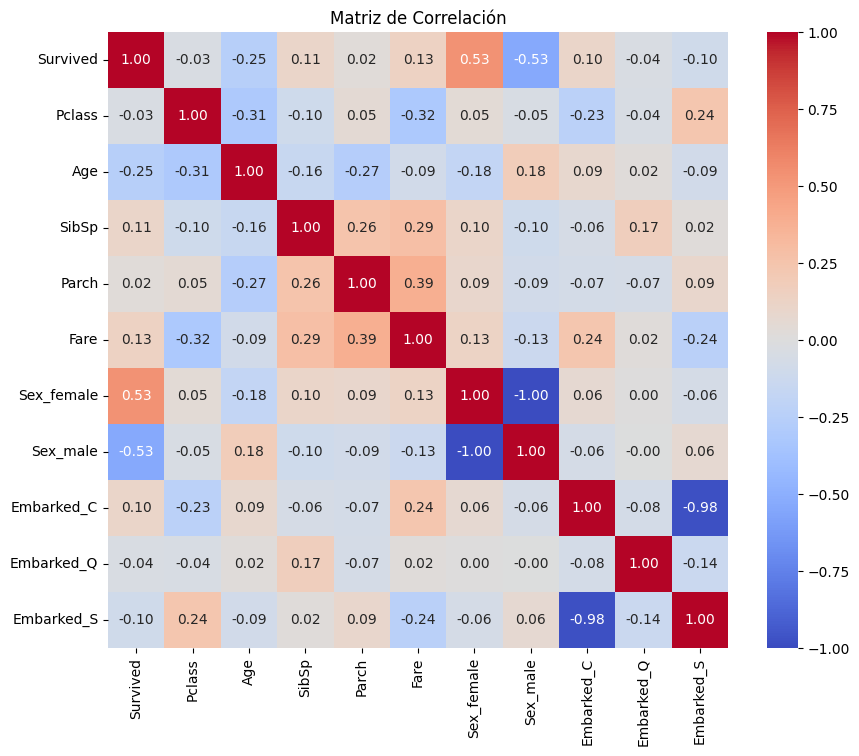

In [5]:
#sns.pairplot(df_onehot)
#plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df_onehot.corr(method='pearson'), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## Matriz de correlación

Además de eliminar aquellos valores que ya a simple vista se pueden ver que no van a resultar de utilidad, también se ha decidido hacer una matriz de correlación con el resto. Para esto, aquellas columnas con valores no numéricos se han transformado mediante onehot-encoding para poder tenerlos en cuenta en nuestra matriz. Gracias a los resultados de la matriz de correlación, podemos observar como el resto de datos restantes no se encuentran con correlaciones tan altas como para poder descartar uno de los dos ya que estarían representando prácticamente lo mismo.

De entre todos los atributos podemos destacar la correlación entre sobrevivir y el sexo femenino. A su vez esta fuerte relación desaparece cuando el sexo es masculino. Luego otra de las correlaciones que tiene sentido es la del precio del ticket y el número de

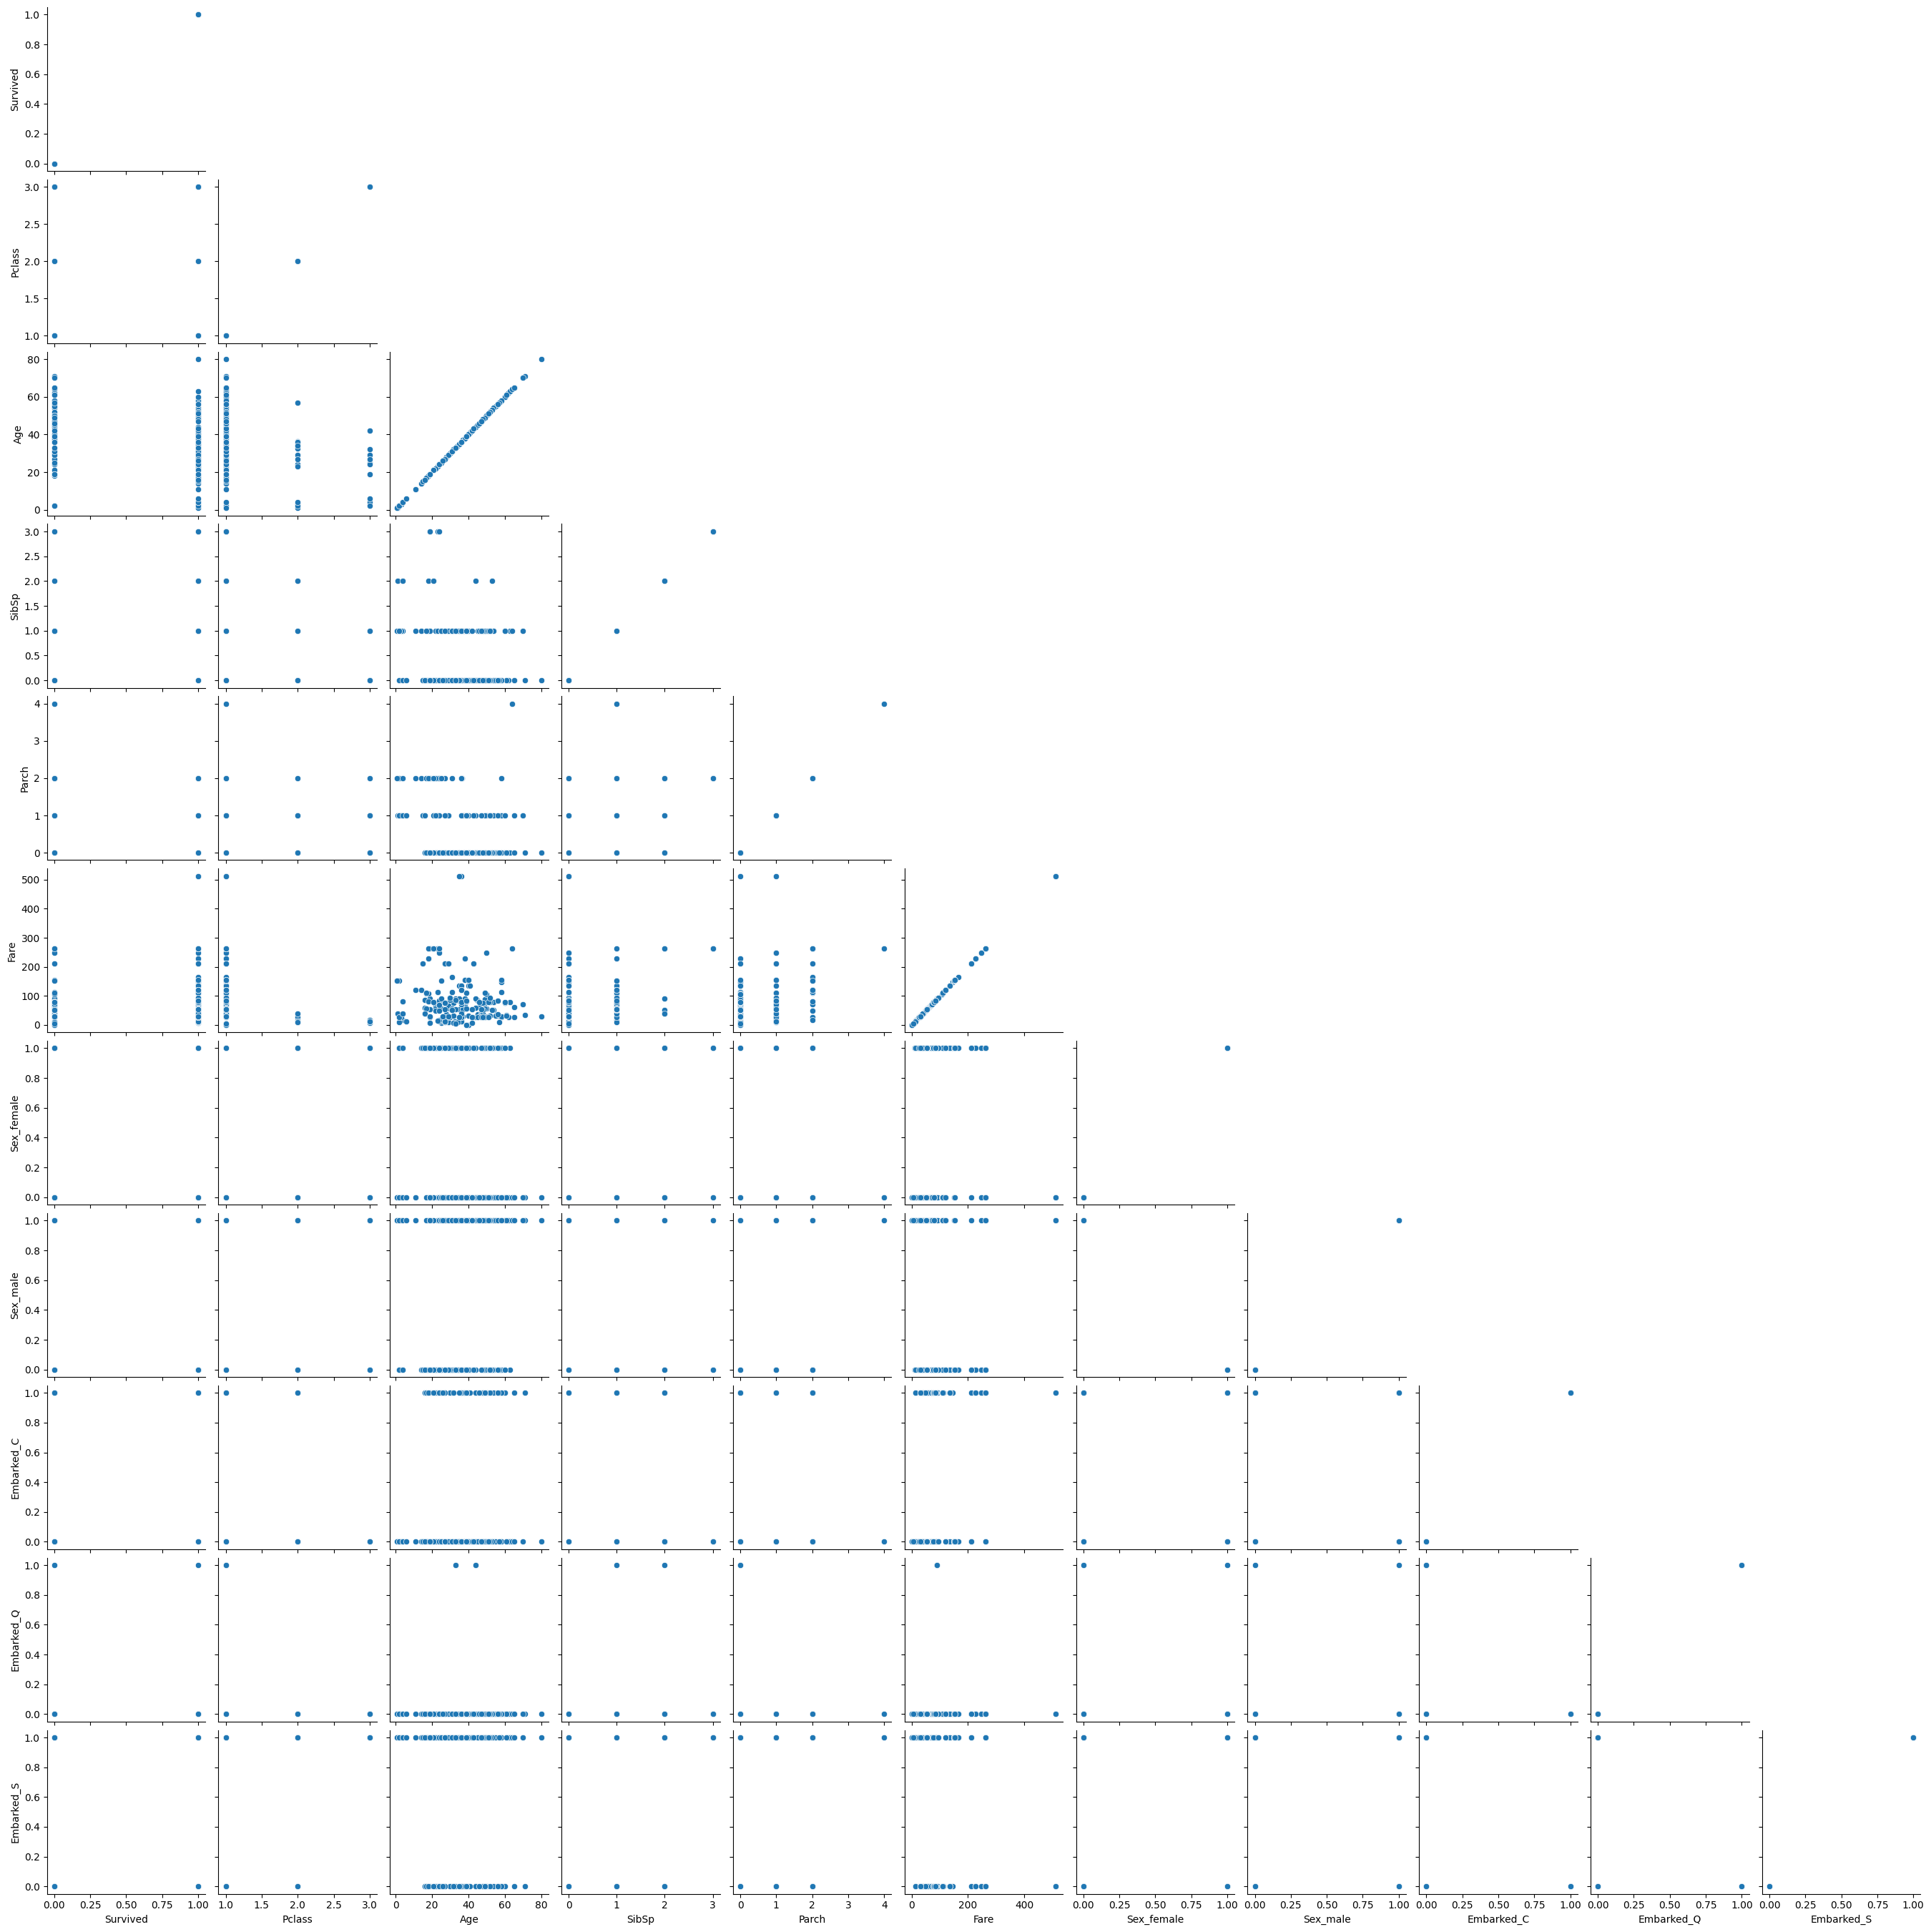

In [7]:
sns.pairplot(df_onehot, corner=True, diag_kind=None)

In [26]:
print(df.select_dtypes(include=['number']).describe())

         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean     0.672131    1.191257    0.519126   35.674426    0.464481    0.475410   
std      0.470725    0.515187    0.501005   15.643866    0.644159    0.754617   
min      0.000000    1.000000    0.000000    0.920000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000   24.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000   36.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000   47.500000    1.000000    1.000000   
max      1.000000    3.000000    1.000000   80.000000    3.000000    4.000000   

             Fare    Embarked  
count  183.000000  183.000000  
mean    78.682469    1.278689  
std     76.347843    0.957294  
min      0.000000    0.000000  
25%     29.700000    0.000000  
50%     57.000000    2.000000  
75%     90.000000    2.000000  
max    512.329

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38.0,1,0,71.2833,0
1,1,1,0,35.0,1,0,53.1000,2
2,0,1,1,54.0,0,0,51.8625,2
3,1,3,0,4.0,1,1,16.7000,2
4,1,1,0,58.0,0,0,26.5500,2
...,...,...,...,...,...,...,...,...
178,1,1,0,47.0,1,1,52.5542,2
179,0,1,1,33.0,0,0,5.0000,2
180,1,1,0,56.0,0,1,83.1583,0
181,1,1,0,19.0,0,0,30.0000,2


In [24]:

def grafico_tarta(categorico):
    count = df[categorico].value_counts()

    plt.figure(figsize=(6, 6))
    count.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=count.index, colors=['#66b3ff','#99ff99','#ff6666'])
    plt.title('Distribución de ' + categorico)
    plt.ylabel('')  # Eliminar la etiqueta de Y
    plt.show()

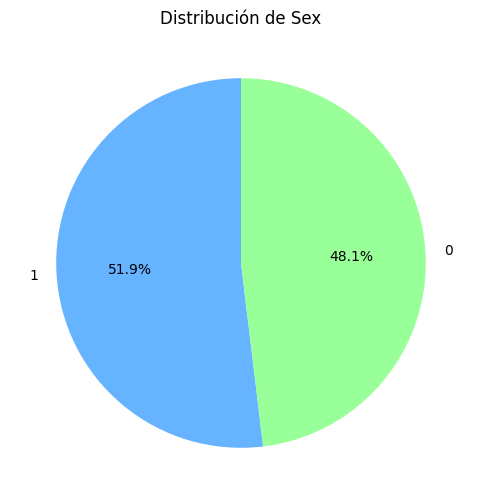

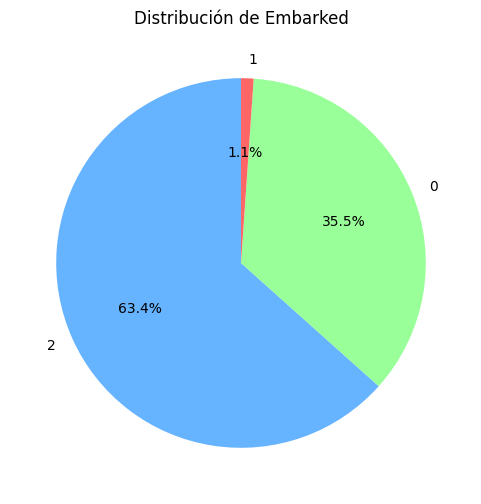

In [25]:
grafico_tarta('Sex')
grafico_tarta('Embarked')

In [9]:
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df_onehot), columns=df_onehot.columns)

display(df_norm)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.468892,0.333333,0.00,0.139136,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.430956,0.333333,0.00,0.103644,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.671219,0.000000,0.00,0.101229,0.0,1.0,0.0,0.0,1.0
3,1.0,1.0,0.038948,0.333333,0.25,0.032596,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.721801,0.000000,0.00,0.051822,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.582701,0.333333,0.25,0.102579,1.0,0.0,0.0,0.0,1.0
179,0.0,0.0,0.405665,0.000000,0.00,0.009759,0.0,1.0,0.0,0.0,1.0
180,1.0,0.0,0.696510,0.000000,0.25,0.162314,1.0,0.0,1.0,0.0,0.0
181,1.0,0.0,0.228629,0.000000,0.00,0.058556,1.0,0.0,0.0,0.0,1.0
